In [1]:
# -*- coding: utf-8 -*-
"""
Spyder Editor

This is a temporary script file.
"""

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision as tv
from collections import OrderedDict,Counter
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.datasets import load_breast_cancer,load_wine
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier


X,y = load_wine(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y)

print(sorted(Counter(y_train).items()))

weight = np.bincount(y_train)/len(y_train)
cld = DecisionTreeClassifier()
cld.fit(X_train,y_train)
print(f'Decision Tree Classifier:\n \tTraining accuracy= %{cld.score(X_train,y_train)*100}')
print(f'\tTraining accuracy= %{round(cld.score(X_test,y_test)*100,2)}')

clr = RandomForestClassifier()
clr.fit(X_train,y_train)
print(f'Random Forest Classifier:\n \tTraining accuracy= %{clr.score(X_train,y_train)*100}')
print(f'\tTraining accuracy= %{round(clr.score(X_test,y_test)*100,2)}')

ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2))
ada.fit(X_train,y_train)
print(f'AdAboost Classifier:\n \tTraining accuracy= %{ada.score(X_train,y_train)*100}')
print(f'\tTraining accuracy= %{round(ada.score(X_test,y_test)*100,2)}')
GridSearchCV(ada, param_grid={})

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(13, 100)
        self.layer2 = nn.Linear(100, 100)
        self.layer3 = nn.Linear(100, 100)
        self.layer4 = nn.Linear(100, 3)
    def forward(self,x):
        x = F.leaky_relu_(self.layer1(x))
        x = F.leaky_relu_(self.layer2(x))
        x = F.leaky_relu_(self.layer3(x))
        x = F.leaky_relu_(self.layer4(x))
        return x

net = Net()

[(0, 41), (1, 50), (2, 33)]
Decision Tree Classifier:
 	Training accuracy= %100.0
	Training accuracy= %90.74
Random Forest Classifier:
 	Training accuracy= %100.0
	Training accuracy= %100.0
AdAboost Classifier:
 	Training accuracy= %100.0
	Training accuracy= %100.0


In [2]:
def learn(net,lr,X,y,epochs):
    optimizer = torch.optim.SGD(net.parameters(),lr=lr)
    cretirion = nn.MSELoss()
    for epoch in range(epochs):
        optimizer.zero_grad()
        output = net(X)
        loss = cretirion(output,y)
        loss.backward()
        optimizer.step()
        print(f'{epoch}: {loss.item()}')

xx = torch.tensor(X_train,dtype=torch.float32)
yy = torch.tensor(y_train,dtype=torch.int64)

In [3]:
F.mse_loss(torch.argmax(net(xx),dim=1),yy)

RuntimeError: "mse_cpu" not implemented for 'Long'

In [127]:
learn(net,1e-5,xx,yy,100)

C:\Users\aa97842\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:431: UserWarning: Using a target size (torch.Size([124])) that is different to the input size (torch.Size([124, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


RuntimeError: The size of tensor a (3) must match the size of tensor b (124) at non-singleton dimension 1

In [86]:
with torch.no_grad():
    predict = net(xx)
    correct = torch.argmax(predict,dim=1).eq(yy).sum()

# 1. Nearest Neighbour

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

plt.style.use('dark_background')

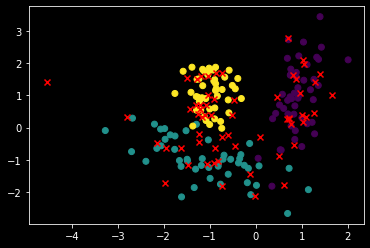

In [4]:
X,y = make_classification(n_samples=200,n_features=2,n_informative=2,
                          n_redundant=0,n_classes=3,n_clusters_per_class=1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)
plt.scatter(X_test[:,0],X_test[:,1],c='r',marker='x');

In [5]:
knn = KNeighborsClassifier(13)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9833333333333333

In [6]:
knn.score(X_train,y_train)

0.9714285714285714

In [7]:
m = knn.kneighbors_graph(X)

In [8]:
from matplotlib.colors import ListedColormap

In [9]:
h =0.02
cmap_light = ListedColormap(['grey', 'black', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])
x_max,x_min = X[:,0].max()+1,X[:,0].min() -1
y_max,y_min = X[:,1].max()+1,X[:,1].min() -1
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

In [10]:
Z = knn.predict(np.c_[xx.ravel(),yy.ravel()])
Z.shape

(173340,)

In [11]:
Z = Z.reshape(xx.shape)

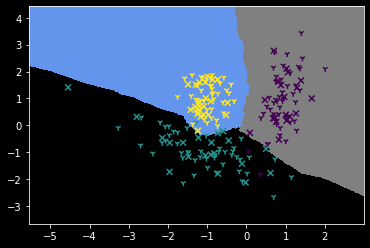

In [12]:
#plt.figure(figsize=(10,8))
plt.pcolormesh(xx,yy,Z,cmap=cmap_light)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,marker='1')
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,marker='x');

# 2.Naive Bayes Classifier

In [13]:
from sklearn.naive_bayes import GaussianNB,BaseDiscreteNB

In [14]:
cln = GaussianNB()
cln.fit(X_train,y_train)
cln.score(X_test,y_test)

0.9666666666666667

In [15]:
Z = cln.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)

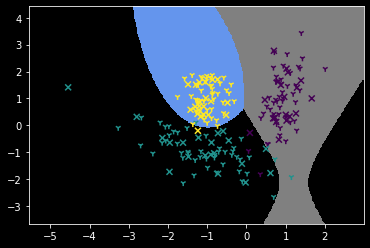

In [16]:
#plt.figure(figsize=(10,8))
plt.pcolormesh(xx,yy,Z,cmap=cmap_light)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,marker='1')
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,marker='x');